#Funciones del punto 1 y 2

In [1]:


def obtener_submatriz(matriz, fila_excluida, col_excluida):
    """Retorna una submatriz excluyendo la fila y columna dadas."""
    return [
        [fila for j, fila in enumerate(fila_actual) if j != col_excluida]
        for i, fila_actual in enumerate(matriz) if i != fila_excluida
    ]

def determinante(matriz):
    """Calcula el determinante de una matriz de forma recursiva."""
    n = len(matriz)

    # Caso base: matriz 1x1
    if n == 1:
        return matriz[0][0]

    # Caso base: matriz 2x2
    if n == 2:
        return matriz[0][0] * matriz[1][1] - matriz[0][1] * matriz[1][0]

    det = 0
    # Expansión por cofactores a lo largo de la primera fila
    for j in range(n):
        signo = (-1) ** j  # Alternancia de signos: (+1, -1, +1, ...)
        submatriz = obtener_submatriz(matriz, 0, j)
        det += signo * matriz[0][j] * determinante(submatriz)

    return det

# Solicitar tamaño de la matriz al usuario
n = int(input("Ingrese el tamaño de la matriz (n): "))

# Solicitar elementos de la matriz
print("Ingrese los elementos de la matriz fila por fila (separados por espacios):")
matriz = []
for _ in range(n):
    fila = list(map(float, input().split()))
    matriz.append(fila)

# Calcular y mostrar el determinante
resultado = determinante(matriz)
print(f"El determinante de la matriz es: {resultado}")

Ingrese el tamaño de la matriz (n): 2
Ingrese los elementos de la matriz fila por fila (separados por espacios):
1 2
1 2
El determinante de la matriz es: 0.0


In [2]:
import numpy as np

def diagonalizar_matriz(matriz):
    """
    Diagonaliza una matriz encontrando sus autovalores y autovectores.

    Args:
        matriz: Matriz cuadrada a diagonalizar

    Returns:
        P: Matriz de autovectores (columnas)
        D: Matriz diagonal con autovalores
        P_inv: Inversa de P
    """
    # Calcular autovalores y autovectores
    autovalores, autovectores = np.linalg.eig(matriz)

    # Crear matriz diagonal con autovalores
    D = np.diag(autovalores)

    # La matriz de autovectores es P
    P = autovectores

    # Calcular la inversa de P
    P_inv = np.linalg.inv(P)

    return P, D, P_inv

# Solicitar tamaño de la matriz al usuario
n = int(input("Ingrese el tamaño de la matriz (n): "))

# Solicitar elementos de la matriz
print("Ingrese los elementos de la matriz fila por fila (separados por espacios):")
matriz = []
for i in range(n):
    fila = list(map(float, input(f"Fila {i+1}: ").split()))
    matriz.append(fila)

A = np.array(matriz)

# Diagonalizar la matriz
P, D, P_inv = diagonalizar_matriz(A)

print("\nMatriz original A:")
print(A)

print("\nMatriz de autovectores P:")
print(P)

print("\nMatriz diagonal D (autovalores en la diagonal):")
print(D)

print("\nInversa de P (P⁻¹):")
print(P_inv)

# Verificar que A = P * D * P⁻¹
A_reconstruida = P @ D @ P_inv
print("\nVerificación: A = P * D * P⁻¹")
print(A_reconstruida)



Ingrese el tamaño de la matriz (n): 2
Ingrese los elementos de la matriz fila por fila (separados por espacios):
Fila 1: 1 2
Fila 2: 1 2

Matriz original A:
[[1. 2.]
 [1. 2.]]

Matriz de autovectores P:
[[-0.89442719 -0.70710678]
 [ 0.4472136  -0.70710678]]

Matriz diagonal D (autovalores en la diagonal):
[[0. 0.]
 [0. 3.]]

Inversa de P (P⁻¹):
[[-0.74535599  0.74535599]
 [-0.47140452 -0.94280904]]

Verificación: A = P * D * P⁻¹
[[1. 2.]
 [1. 2.]]


#Clase sin numpy

Hacemos la clase con las funciones hechas modificadas para dar matrices aleatorias y sin usar numpy. Esto a manera de experimento más que nada.

In [82]:
import random
import copy

class OperacionesMatricesNP:
    def __init__(self, matriz=None):
        self.matriz = matriz

    # -------------------------
    # Generación y utilidades
    # -------------------------
    def matriz_aleatoria_uniforme(self, n, minimo=-1, maximo=1):
        return [[random.uniform(minimo, maximo) for _ in range(n)] for _ in range(n)]

    def obtener_submatriz(self, matriz, fila_excluida, col_excluida):
        return [
            [elem for j, elem in enumerate(fila) if j != col_excluida]
            for i, fila in enumerate(matriz) if i != fila_excluida
        ]

    # -------------------------
    # Determinante recursivo
    # -------------------------
    def determinante(self, matriz):
        n = len(matriz)
        if n == 1:
            return matriz[0][0]
        if n == 2:
            return matriz[0][0] * matriz[1][1] - matriz[0][1] * matriz[1][0]

        det = 0
        for j in range(n):
            signo = (-1) ** j
            sub = self.obtener_submatriz(matriz, 0, j)
            det += signo * matriz[0][j] * self.determinante(sub)
        return det

    # -------------------------
    # Operaciones elementales
    # -------------------------
    def transveccion(self, A, origen, destino, alfa):
        """Fila_destino = Fila_destino + alfa * Fila_origen"""
        n = len(A[0])
        A[destino] = [A[destino][i] + alfa * A[origen][i] for i in range(n)]
        return A

    def pivoteo(self, A):
        """
        Lleva A a forma escalonada superior usando eliminación de Gauss
        con pivoteo parcial (intercambio de filas).
        """
        n = len(A)
        M = copy.deepcopy(A)
        for i in range(n):
            # Selección de pivote (parcial)
            max_fila = max(range(i, n), key=lambda r: abs(M[r][i]))
            if abs(M[max_fila][i]) < 1e-12:
                continue
            if i != max_fila:
                M[i], M[max_fila] = M[max_fila], M[i]

            # Hacer ceros debajo del pivote
            for j in range(i+1, n):
                if M[j][i] != 0:
                    alfa = -M[j][i] / M[i][i]
                    self.transveccion(M, i, j, alfa)
        return M

    # -------------------------
    # Resolver sistemas homogéneos Ax = 0
    # -------------------------
    def resolver_sistema_gauss(self, A):
        """
        Resuelve Ax=0 encontrando un vector no trivial en el núcleo de A
        usando Gauss con pivoteo.
        """
        n = len(A)
        M = [fila[:] for fila in A]

        fila = 0
        for col in range(n):
            # Pivoteo parcial
            max_fila = max(range(fila, n), key=lambda r: abs(M[r][col]))
            if abs(M[max_fila][col]) < 1e-10:
                continue
            if fila != max_fila:
                M[fila], M[max_fila] = M[max_fila], M[fila]

            # Normalizar fila pivote
            piv = M[fila][col]
            for j in range(n):
                M[fila][j] /= piv

            # Eliminar en otras filas
            for i in range(n):
                if i != fila:
                    factor = M[i][col]
                    for j in range(n):
                        M[i][j] -= factor * M[fila][j]

            fila += 1
            if fila == n:
                break

        # Buscar variable libre y darle valor 1
        solucion = [0]*n
        pivotes = [next((j for j,v in enumerate(f) if abs(v)>1e-10), None) for f in M]
        piv_cols = [p for p in pivotes if p is not None]
        libres = [c for c in range(n) if c not in piv_cols]
        if not libres:
            return solucion
        libre = libres[0]
        solucion[libre] = 1
        # Sustituir hacia atrás
        for i in range(n):
            if pivotes[i] is not None:
                j = pivotes[i]
                suma = sum(M[i][k]*solucion[k] for k in range(j+1, n))
                solucion[j] = -suma
        return solucion

    # -------------------------
    # Inversa por Gauss-Jordan
    # -------------------------
    def inversa(self, A):
        """Calcula la inversa de A usando Gauss-Jordan con pivoteo."""
        n = len(A)
        M = [fila + [1 if i==j else 0 for j in range(n)] for i, fila in enumerate(copy.deepcopy(A))]

        for i in range(n):
            # Pivoteo parcial
            max_fila = max(range(i, n), key=lambda r: abs(M[r][i]))
            if i != max_fila:
                M[i], M[max_fila] = M[max_fila], M[i]

            piv = M[i][i]
            if abs(piv) < 1e-12:
                raise ValueError("Matriz no invertible")

            # Normalizar fila
            for j in range(2*n):
                M[i][j] /= piv

            # Eliminar en otras filas
            for k in range(n):
                if k != i:
                    factor = M[k][i]
                    for j in range(2*n):
                        M[k][j] -= factor * M[i][j]

        return [fila[n:] for fila in M]

    # -------------------------
    # Diagonalización
    # -------------------------
    def diagonalizar(self, matriz):
        """
        Intenta diagonalizar A buscando autovalores (aprox) y autovectores con Gauss.
        Solo práctico para matrices pequeñas (≤ 3x3).
        """
        n = len(matriz)
        # Buscar autovalores aproximando raíces de det(A - λI)=0
        valores_propios = []
        for x in [i/2 for i in range(-10, 11)]:
            M = [[matriz[i][j] - (x if i==j else 0) for j in range(n)] for i in range(n)]
            if abs(self.determinante(M)) < 1e-2:
                valores_propios.append(round(x,2))
        valores_propios = list(set(valores_propios))

        # Buscar autovectores
        vectores_propios = []
        for lam in valores_propios:
            A_l = [[matriz[i][j] - (lam if i==j else 0) for j in range(n)] for i in range(n)]
            v = self.resolver_sistema_gauss(A_l)
            vectores_propios.append(v)

        # Formar P, D y P^-1
        P = [[vectores_propios[j][i] for j in range(n)] for i in range(n)]
        D = [[valores_propios[i] if i==j else 0 for j in range(n)] for i in range(n)]
        P_inv = self.inversa(P)

        return P, D, P_inv



#Clase con numpy

In [85]:
import numpy as np
import random

class OperacionesMatrices:
    def __init__(self, matriz=None):
        self.matriz = np.array(matriz) if matriz is not None else None

    def matriz_aleatoria_uniforme(self, n, minimo=-1, maximo=1):
        #Genera una matriz n×n con valores uniformes en (minimo, maximo).
        return np.random.uniform(minimo, maximo, (n, n))

    def obtener_submatriz(self, matriz, fila_excluida, col_excluida):
        #Obtiene una submatriz eliminando una fila y una columna.
        matriz = np.array(matriz)
        return np.delete(np.delete(matriz, fila_excluida, axis=0), col_excluida, axis=1)

    def determinante(self, matriz):
        #Calcula el determinante de una matriz n×n.
        matriz = np.array(matriz)
        return np.linalg.det(matriz)

    def diagonalizar(self, matriz):

        #Diagonaliza una matriz A encontrando sus autovalores y autovectores.

        #Args:
            #matriz: Matriz cuadrada a diagonalizar

        #Returns:
            #P: Matriz de autovectores (columnas)
            #D: Matriz diagonal con autovalores
            #P_inv: Inversa de P

        A = np.array(matriz, dtype=float)

        # Calcular autovalores y autovectores
        autovalores, autovectores = np.linalg.eig(A)

        # Matriz diagonal con los autovalores
        D = np.diag(autovalores)

        # Matriz de autovectores
        P = autovectores

        # Inversa de P
        P_inv = np.linalg.inv(P)

        return P, D, P_inv


In [86]:
op = OperacionesMatrices()

#Puntos 3, 4 y 5

## Punto 3

In [106]:
import time

In [136]:
import time

def contarTiempos(N, n):
  tiempos_det = []
  tiempos_diag = []

  for K in range(N):
    A = op.matriz_aleatoria_uniforme(n)

    #Calculamos los tiempos de los determinantes
    inicio = time.time()
    K = op.determinante(A)
    fin = time.time()
    tiempos_det.append(fin - inicio)

    #Calculamos los tiempos de las diagonalizaciones
    inicio = time.time()
    K = op.diagonalizar(A)
    fin = time.time()
    tiempos_diag.append(fin - inicio)

  return tiempos_det, tiempos_diag

## Punto 4

In [128]:
def promedios(N, n):
    tiempos_det, tiempos_diag = contarTiempos(N, n)

    # Promedios
    m_n = np.mean(tiempos_det)
    l_n = np.mean(tiempos_diag)

    return m_n, l_n

In [130]:
m_n, l_n = promedios(20, 3)

print(f"Promedio determinante m({n}) = {m_n:.6f} segundos")
print(f"Promedio diagonalización l({n}) = {l_n:.6f} segundos")

Promedio determinante m(2) = 0.000024 segundos
Promedio diagonalización l(2) = 0.000119 segundos


## Punto 5

In [131]:
import matplotlib.pyplot as plt

def calcular_promedios_varios(N, n_vals):
    resultados_m = []
    resultados_l = []

    for n in n_vals:
        m_n, l_n = promedios(N, n)
        resultados_m.append(m_n)
        resultados_l.append(l_n)

    return resultados_m, resultados_l


In [132]:
def graficar_resultados(n_vals, resultados_m, resultados_l):
    plt.figure(figsize=(8, 6))

    plt.plot(n_vals, resultados_m, marker="o", label="m(n): tiempos determinante")
    plt.plot(n_vals, resultados_l, marker="s", label="l(n): tiempos diagonalización")

    plt.xlabel("Tamaño de la matriz n")
    plt.ylabel("Tiempo promedio (segundos)")
    plt.title("Comparación de tiempos de determinante y diagonalización")
    plt.legend()
    plt.grid(True)
    plt.show()


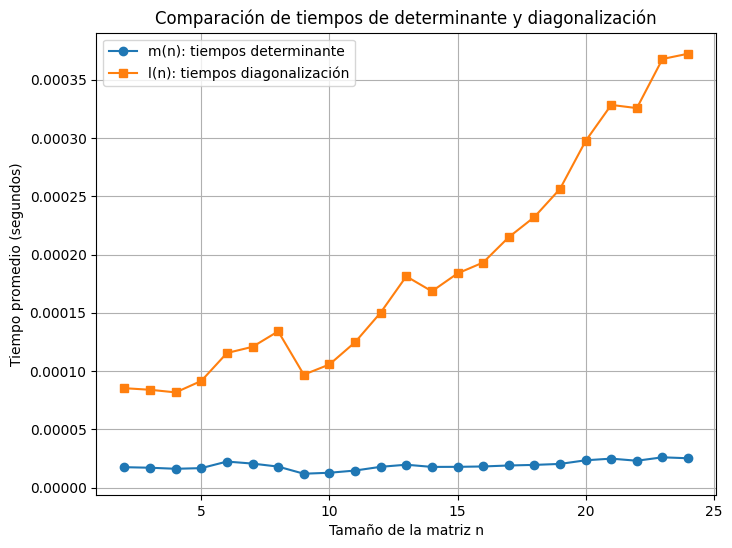

In [147]:
op = OperacionesMatrices()

# Número de repeticiones por cada n
N = 100

# Valores de n a probar
n_vals = list(range(2, 25))

# Calcular resultados
resultados_m, resultados_l = calcular_promedios_varios(N, n_vals)

# Graficar
graficar_resultados(n_vals, resultados_m, resultados_l)


In [148]:
coef_det = np.polyfit(n_vals, resultados_m, 3)  # polinomio grado 3
coef_diag = np.polyfit(n_vals, resultados_l, 3)

print("Ajuste determinante (grado 3):", coef_det)
print("Ajuste diagonalización (grado 3):", coef_diag)


Ajuste determinante (grado 3): [ 5.25344840e-10  2.27069801e-08 -5.37578339e-07  1.92670806e-05]
Ajuste diagonalización (grado 3): [8.55780619e-09 3.12286471e-07 2.35967439e-07 8.43985857e-05]


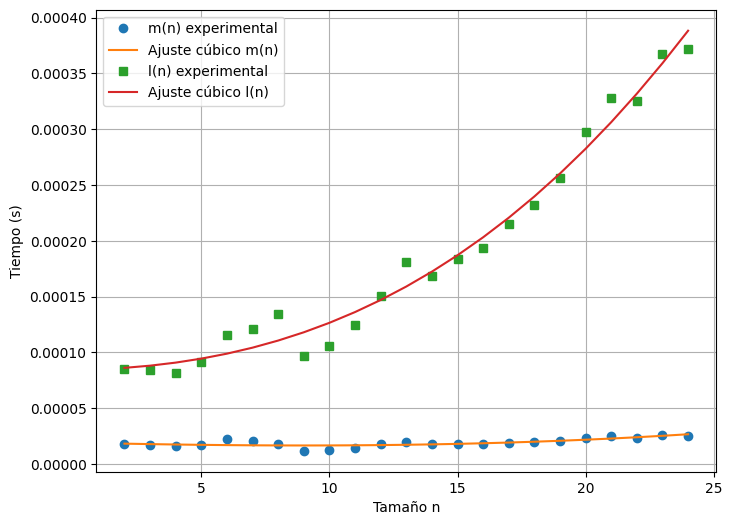

In [149]:
p_det = np.poly1d(coef_det)
p_diag = np.poly1d(coef_diag)

# Valores ajustados
ajuste_det = p_det(n_vals)
ajuste_diag = p_diag(n_vals)

# Graficar original + ajuste
plt.figure(figsize=(8,6))
plt.plot(n_vals, resultados_m, "o", label="m(n) experimental")
plt.plot(n_vals, ajuste_det, "-", label="Ajuste cúbico m(n)")
plt.plot(n_vals, resultados_l, "s", label="l(n) experimental")
plt.plot(n_vals, ajuste_diag, "-", label="Ajuste cúbico l(n)")
plt.xlabel("Tamaño n")
plt.ylabel("Tiempo (s)")
plt.legend()
plt.grid(True)
plt.show()
